# Demonstration on ResNet50, InceptionV3 and Xception

In [1]:
import tensorflow as tf

In [2]:
import eager_gradcam

## ResNet50

In [3]:
model_init = tf.keras.applications.ResNet50(include_top=False)

/Users/kjczarne/anaconda3/envs/fubarenv/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
y = model_init.output
# y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1000, activation=None, name='fc1000')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)

In [5]:
tf.executing_eagerly()

True

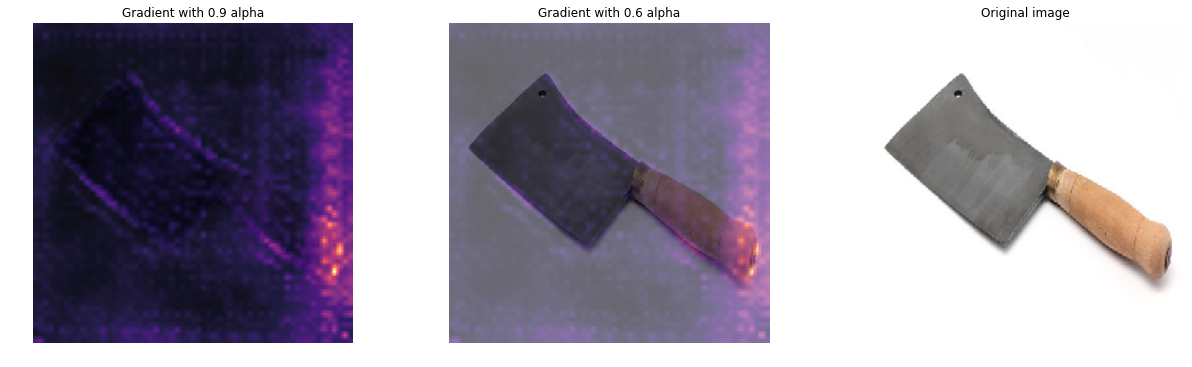

In [6]:
eager_gradcam.grad_cam('images/cleaver.jpg', model, (244,244))

## InceptionV3

In [7]:
model_init = tf.keras.applications.InceptionV3(include_top=False)

In [8]:
y = model_init.output
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1000, activation=None, name='fc1000')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)

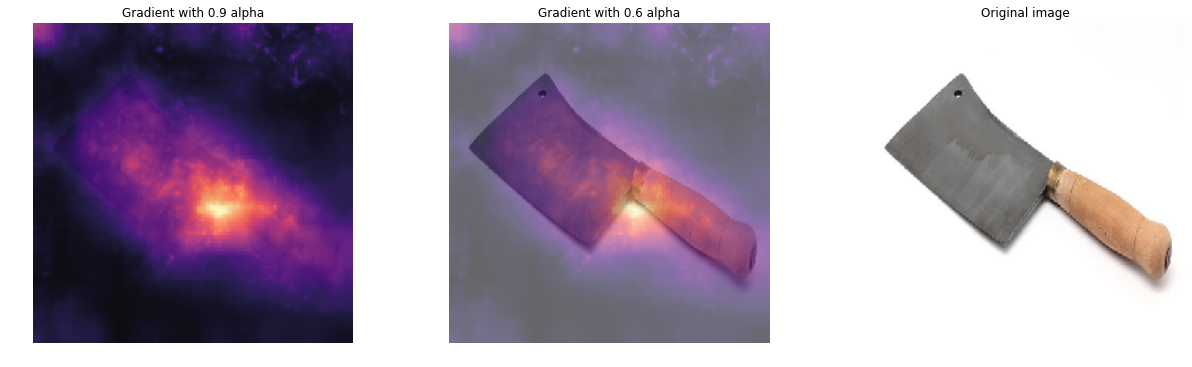

In [9]:
eager_gradcam.grad_cam('images/cleaver.jpg', model, (244,244))

## Xception

In [10]:
model_init = tf.keras.applications.Xception(include_top=False)

In [11]:
y = model_init.output
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1000, activation=None, name='fc1000')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)

Xception is a bit 'exceptional' because it uses `SeparableConv2D` layers apart from normal `Conv2D` layers, thus we watch both layer types.

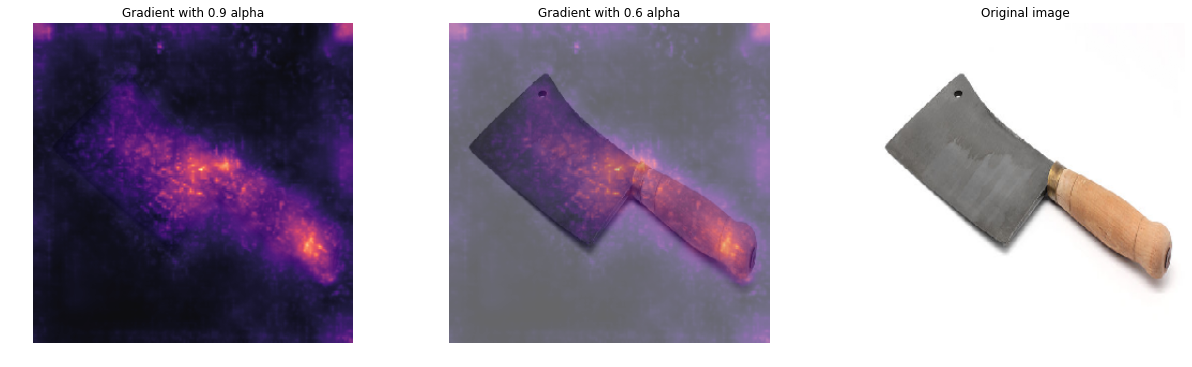

In [12]:
eager_gradcam.grad_cam('images/cleaver.jpg', model, (299,299), watch_layer_instances=(tf.keras.layers.Conv2D, tf.keras.layers.SeparableConv2D))